<a href="https://colab.research.google.com/github/BetikuOluwatobi/Daily-Tempearature-Forecast-Using-Recurrent-Neural-Networks/blob/main/Daily_Temperature_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

## Mounting Drive

In [4]:
data_names = os.listdir('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/raw-data')

# Load multiple CSV files into a single pandas dataframe

This code is a function that loads multiple CSV files located in a specific directory into a single pandas dataframe. The function takes two parameters: `dir`, which is the path to the directory where the CSV files are located, and `data_names`, which is a list of the names of the CSV files to load.

The function first initializes an empty pandas dataframe called `df`. It then loops through each file in `data_names`, reads the file using the `csv` module, and extracts the data starting from the 16th row (excluding the header row). If the first row of the extracted data is empty, it is removed from the data.

The extracted data is then converted into a new pandas dataframe called `df_new` with the first row as column names. The `df_new` dataframe is concatenated with the `df` dataframe along the row axis using `pd.concat()`, ignoring the original index values.

Finally, the function returns the concatenated dataframe `df`.

Note that the code assumes that all CSV files have the same format and the same number of columns. It also assumes that the CSV files have a header row. If these assumptions are not true, the code may need to be modified accordingly.

In [5]:
import csv
path = '/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/raw-data/'
def load_datas(dir=path,data_names = data_names):
  df = pd.DataFrame()
  for i, name in enumerate(data_names):
    if i > 0:
      the_file = open(path+name, 'r')
      reader = csv.reader(the_file)
      data = []
      for i, row in enumerate(reader):
          if i >= 15:
            data.append(row)
      if len(data[0]) < 1:
        data = data[1:]
      df_new = pd.DataFrame(data[1:],columns=data[0])
      df = pd.concat([df,df_new],axis=0,ignore_index=True)
  return df


In [6]:
df = load_datas(dir=path,data_names = data_names)

In [7]:
df

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2017-04-01 00:00,2017,04,01,00:00,0.6,,0.1,,96,...,,,,99.91,,,,,,NA
1,2017-04-01 01:00,2017,04,01,01:00,0.6,,0.1,,96,...,,,,99.91,,,,,,NA
2,2017-04-01 02:00,2017,04,01,02:00,0.7,,0.1,,96,...,,,,99.94,,,,,,NA
3,2017-04-01 03:00,2017,04,01,03:00,0.6,,0.0,,96,...,,,,99.99,,,,,,NA
4,2017-04-01 04:00,2017,04,01,04:00,0.7,,0.1,,96,...,,,,100.06,,,,,,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40171,2017-09-30 19:00,2017,09,30,19:00,9.3,,4.0,,70,...,,,,101.73,,,,,,NA
40172,2017-09-30 20:00,2017,09,30,20:00,7.7,,5.7,,87,...,,,,101.77,,,,,,NA
40173,2017-09-30 21:00,2017,09,30,21:00,6.4,,5.4,,93,...,,,,101.77,,,,,,NA
40174,2017-09-30 22:00,2017,09,30,22:00,4.2,,3.4,,95,...,,,,101.78,,,,,,NA


## Converting the date/time column to python datatime data type

In [8]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

### Sorting rows by the Date/Time column

In [9]:
df = df.sort_values(by='Date/Time',ignore_index=True)

In [10]:
pd.concat([df['Date/Time'],pd.Series(df['Temp (°C)'].values,name='Temp')],axis=1)

,Date/Time,Temp
0,2015-01-01 00:00:00,-5.9
1,2015-01-01 01:00:00,-5.9
2,2015-01-01 02:00:00,-6.1
3,2015-01-01 03:00:00,-5.8
4,2015-01-01 04:00:00,-5.7
...,...,...
40171,2019-08-31 19:00:00,None
40172,2019-08-31 20:00:00,None
40173,2019-08-31 21:00:00,None
40174,2019-08-31 22:00:00,None


In [11]:
df

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2015-01-01 00:00:00,2015,01,01,00:00,-5.9,,-11.8,,63,...,,,,100.21,,,,-14,,NA
1,2015-01-01 01:00:00,2015,01,01,01:00,-5.9,,-13.6,,54,...,,,,100.19,,,,-13,,NA
2,2015-01-01 02:00:00,2015,01,01,02:00,-6.1,,-14.2,,53,...,,,,100.17,,,,-14,,NA
3,2015-01-01 03:00:00,2015,01,01,03:00,-5.8,,-13.2,,56,...,,,,100.14,,,,-14,,NA
4,2015-01-01 04:00:00,2015,01,01,04:00,-5.7,,-11.9,,62,...,,,,100.14,,,,-13,,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40171,2019-08-31 19:00:00,2019,08,31,19:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40172,2019-08-31 20:00:00,2019,08,31,20:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40173,2019-08-31 21:00:00,2019,08,31,21:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40174,2019-08-31 22:00:00,2019,08,31,22:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [12]:
df.tail()

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
40171,2019-08-31 19:00:00,2019,08,31,19:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40172,2019-08-31 20:00:00,2019,08,31,20:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40173,2019-08-31 21:00:00,2019,08,31,21:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40174,2019-08-31 22:00:00,2019,08,31,22:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
40175,2019-08-31 23:00:00,2019,08,31,23:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Dropping NA rows

## All rows after 2018 are NAs

In [13]:
df = df.dropna(axis=0)

## Data Description

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39392 entries, 0 to 39935
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date/Time            39392 non-null  datetime64[ns]
 1   Year                 39392 non-null  object        
 2   Month                39392 non-null  object        
 3   Day                  39392 non-null  object        
 4   Time                 39392 non-null  object        
 5   Temp (°C)            39392 non-null  object        
 6   Temp Flag            39392 non-null  object        
 7   Dew Point Temp (°C)  39392 non-null  object        
 8   Dew Point Temp Flag  39392 non-null  object        
 9   Rel Hum (%)          39392 non-null  object        
 10  Rel Hum Flag         39392 non-null  object        
 11  Wind Dir (10s deg)   39392 non-null  object        
 12  Wind Dir Flag        39392 non-null  object        
 13  Wind Spd (km/h)      39392 non-

## All values in weather column are NA

In [15]:
sum(df.Weather == 'NA')

39392

## Weather Column dropped no info given

In [16]:
df = df.drop('Weather',axis=1)

## Columns with Missing Data

In [17]:
columns = ['Temp Flag','Dew Point Temp Flag','Rel Hum Flag','Wind Dir Flag','Wind Spd Flag','Visibility (km)','Visibility Flag','Stn Press Flag','Hmdx','Hmdx Flag','Wind Chill Flag']

### Missing Values Check

In [18]:
(df[columns] == '').sum() #As is show most of this columns data are missing

Temp Flag              39382
Dew Point Temp Flag    39392
Rel Hum Flag           39392
Wind Dir Flag          39392
Wind Spd Flag          39392
Visibility (km)        39392
Visibility Flag        39392
Stn Press Flag         39392
Hmdx                   33450
Hmdx Flag              39392
Wind Chill Flag        39392
dtype: int64

## Dropping the columns with over 80 percent missing data values

In [19]:
(df[columns] == '').mean() * 100 #Over 80% data are missing for all so i will be dropping all columns

Temp Flag               99.974614
Dew Point Temp Flag    100.000000
Rel Hum Flag           100.000000
Wind Dir Flag          100.000000
Wind Spd Flag          100.000000
Visibility (km)        100.000000
Visibility Flag        100.000000
Stn Press Flag         100.000000
Hmdx                    84.915719
Hmdx Flag              100.000000
Wind Chill Flag        100.000000
dtype: float64

In [20]:
df = df.drop(columns=columns,axis=1)

In [21]:
df = df.replace(r'^\s*$', np.nan, regex=True)

## Boolean Check of Data with Missing Values

In [22]:
df.isna().any()

Date/Time              False
Year                   False
Month                  False
Day                    False
Time                   False
Temp (°C)               True
Dew Point Temp (°C)     True
Rel Hum (%)            False
Wind Dir (10s deg)      True
Wind Spd (km/h)        False
Stn Press (kPa)         True
Wind Chill              True
dtype: bool

## Percentage of Missing Values by column after dropping the first batch of missing data

In [23]:
df.isna().mean() * 100 #72 percent of Wind Chill Data is missing thats too large so i will be dropping the column

Date/Time               0.000000
Year                    0.000000
Month                   0.000000
Day                     0.000000
Time                    0.000000
Temp (°C)               0.025386
Dew Point Temp (°C)     0.002539
Rel Hum (%)             0.000000
Wind Dir (10s deg)      0.545796
Wind Spd (km/h)         0.000000
Stn Press (kPa)         0.002539
Wind Chill             74.240963
dtype: float64

## Dropping Missing Columns

In [24]:
df = df.drop(['Wind Dir (10s deg)','Wind Chill'],axis=1)

# Exploratory Data Analysis and Data Types Adjustment

In [25]:
df_cols = ['Year','Month','Day','Temp (°C)','Dew Point Temp (°C)','Rel Hum (%)','Wind Spd (km/h)','Stn Press (kPa)']

In [26]:
df[df_cols] = df[df_cols].apply(pd.to_numeric)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39392 entries, 0 to 39935
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date/Time            39392 non-null  datetime64[ns]
 1   Year                 39392 non-null  int64         
 2   Month                39392 non-null  int64         
 3   Day                  39392 non-null  int64         
 4   Time                 39392 non-null  object        
 5   Temp (°C)            39382 non-null  float64       
 6   Dew Point Temp (°C)  39391 non-null  float64       
 7   Rel Hum (%)          39392 non-null  int64         
 8   Wind Spd (km/h)      39392 non-null  int64         
 9   Stn Press (kPa)      39391 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 3.3+ MB


In [28]:
# pd.get_dummies(pd.to_datetime(df['Time'],unit='ns'))

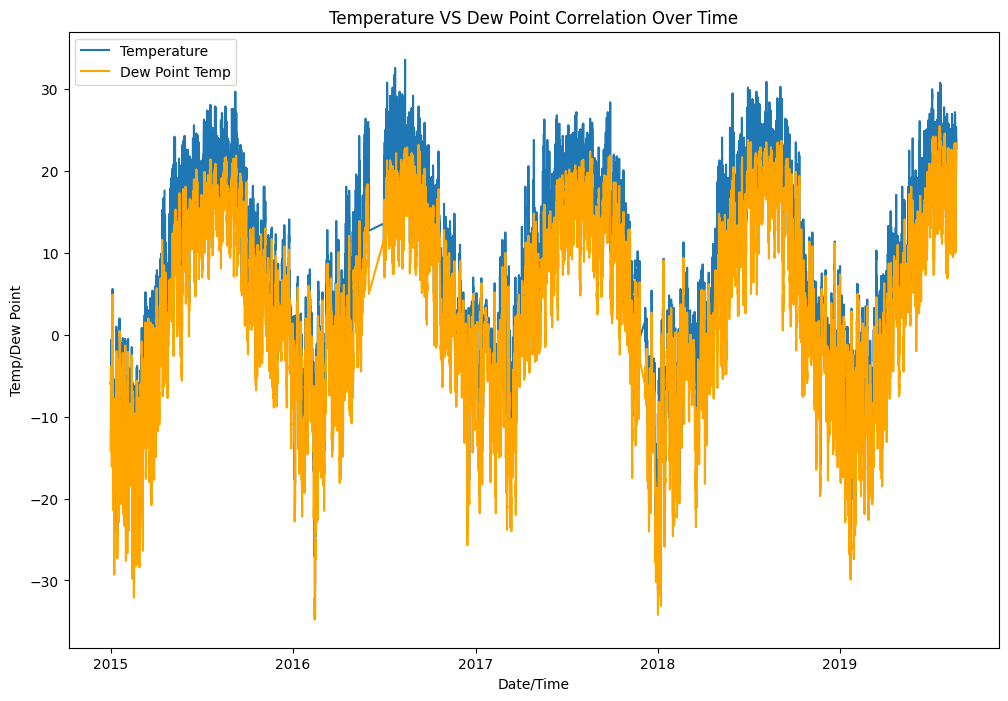

In [29]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['Date/Time'],df['Temp (°C)'],label='Temperature')
ax.plot(df['Date/Time'],df['Dew Point Temp (°C)'],color='orange',label='Dew Point Temp')
ax.set_title('Temperature VS Dew Point Correlation Over Time')
ax.set_xlabel('Date/Time')
ax.set_ylabel('Temp/Dew Point')
ax.legend()

In [30]:
df = df.set_index('Date/Time')

In [31]:
one_day = df['Temp (°C)'].iloc[0:24]

In [32]:
one_day

Date/Time
2015-01-01 00:00:00   -5.9
2015-01-01 01:00:00   -5.9
2015-01-01 02:00:00   -6.1
2015-01-01 03:00:00   -5.8
2015-01-01 04:00:00   -5.7
2015-01-01 05:00:00   -5.3
2015-01-01 06:00:00   -4.2
2015-01-01 07:00:00   -3.8
2015-01-01 08:00:00   -3.7
2015-01-01 09:00:00   -3.2
2015-01-01 10:00:00   -2.8
2015-01-01 11:00:00   -3.5
2015-01-01 12:00:00   -3.5
2015-01-01 13:00:00   -3.4
2015-01-01 14:00:00   -3.3
2015-01-01 15:00:00   -2.7
2015-01-01 16:00:00   -2.6
2015-01-01 17:00:00   -2.7
2015-01-01 18:00:00   -2.3
2015-01-01 19:00:00   -2.4
2015-01-01 20:00:00   -1.8
2015-01-01 21:00:00   -1.3
2015-01-01 22:00:00   -0.9
2015-01-01 23:00:00   -0.9
Name: Temp (°C), dtype: float64

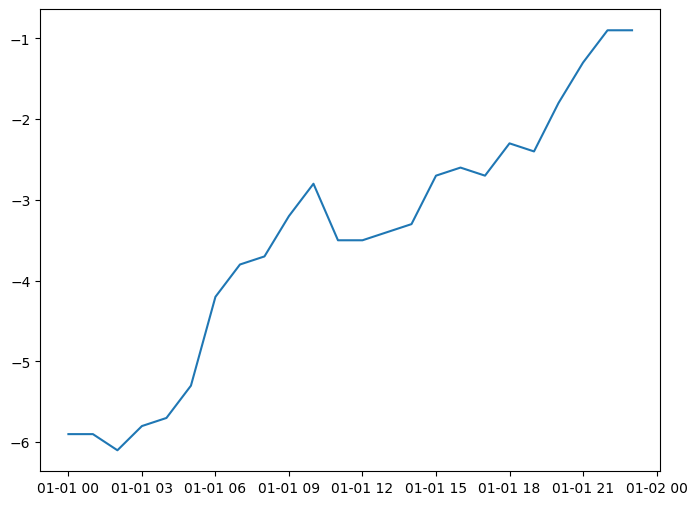

In [33]:
plt.figure(figsize=(8,6))
plt.plot(one_day)

In [34]:
test = df['Temp (°C)'].rolling(24).mean()

In [35]:
test.dropna(inplace=True)

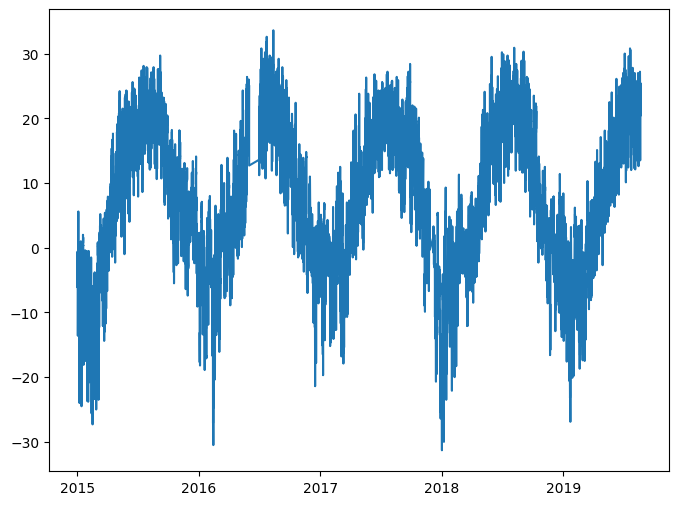

In [36]:
plt.figure(figsize=(8,6))
plt.plot(df['Temp (°C)'])

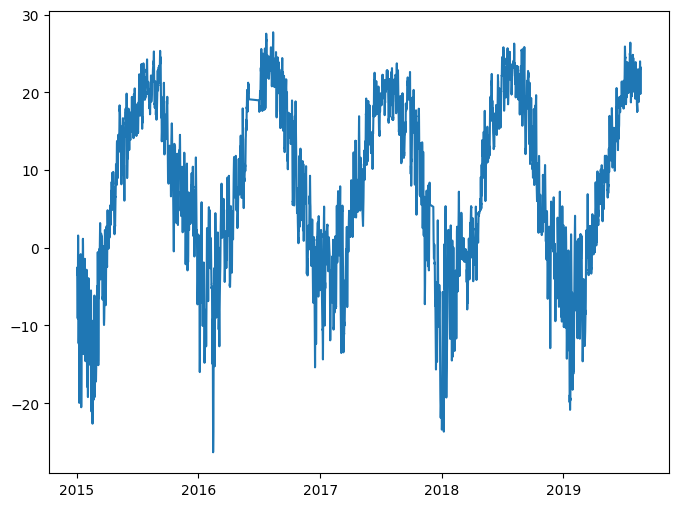

In [37]:
plt.figure(figsize=(8,6))
plt.plot(test)

### Categorizing the time column

In [38]:
pd.get_dummies(df['Time'])

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Date/Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-21 19:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2019-08-21 20:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2019-08-21 21:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### The Year and Time Columns are dropped

In [39]:
df_train = df.drop(['Year','Time','Temp (°C)'],axis=1) #Dropping time for test case
temp = df['Temp (°C)']
df_train = pd.concat([df_train,temp],axis=1)

## Data Description

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39392 entries, 2015-01-01 00:00:00 to 2019-08-21 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                39392 non-null  int64  
 1   Day                  39392 non-null  int64  
 2   Dew Point Temp (°C)  39391 non-null  float64
 3   Rel Hum (%)          39392 non-null  int64  
 4   Wind Spd (km/h)      39392 non-null  int64  
 5   Stn Press (kPa)      39391 non-null  float64
 6   Temp (°C)            39382 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.4 MB


### Filling missing column values with the mean of 6 hr lag temperature values

In [41]:
df_train = df_train.fillna(df_train.rolling(6,min_periods=1).mean())

### Cross-Checking If Missing Values are still Present

In [42]:
df_train.isna().any()

Month                  False
Day                    False
Dew Point Temp (°C)    False
Rel Hum (%)            False
Wind Spd (km/h)        False
Stn Press (kPa)        False
Temp (°C)              False
dtype: bool

### Splitting Data into Train Data and Validation Data

In [43]:
split_time = sum(df_train.index.year == 2015) + sum(df_train.index.year == 2016) + sum(df_train.index.year == 2017)
time_train = df_train.index[:split_time]
x_train = df_train.iloc[:split_time]
time_valid = df_train.index[split_time:]
x_valid = df_train.iloc[split_time:]

window_size = 14
batch_size = 120
shuffle_buffer = 42

### Helper Function for preparing the dataset into a form acceptable by the model

In [44]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,:-1], window[-1,-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

### Dataset Preparation and Model Build

In [45]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)
dataset_test = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

# 4e-4
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-10 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

# [tf.keras.metrics.RootMeanSquaredError()]
# tf.keras.losses.Huber()

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(dataset,validation_data=dataset_test,epochs=50)

Epoch 1/50
210/210 [==============================] - 33s 128ms/step - loss: 7.5776 - root_mean_squared_error: 10.0991 - val_loss: 9.0327 - val_root_mean_squared_error: 11.3960
Epoch 2/50
210/210 [==============================] - 26s 123ms/step - loss: 9.4422 - root_mean_squared_error: 11.7875 - val_loss: 7.8821 - val_root_mean_squared_error: 9.8274
Epoch 3/50
210/210 [==============================] - 27s 130ms/step - loss: 7.6504 - root_mean_squared_error: 9.8960 - val_loss: 7.0523 - val_root_mean_squared_error: 9.0137
Epoch 4/50
210/210 [==============================] - 26s 123ms/step - loss: 8.5900 - root_mean_squared_error: 52.3459 - val_loss: 5.6174 - val_root_mean_squared_error: 7.3093
Epoch 5/50
210/210 [==============================] - 26s 123ms/step - loss: 5.2284 - root_mean_squared_error: 7.2747 - val_loss: 5.0166 - val_root_mean_squared_error: 6.6677
Epoch 6/50
210/210 [==============================] - 26s 122ms/step - loss: 4.4875 - root_mean_squared_error: 6.2551 - v

### Model Evaluation for Multi-Variate Approach

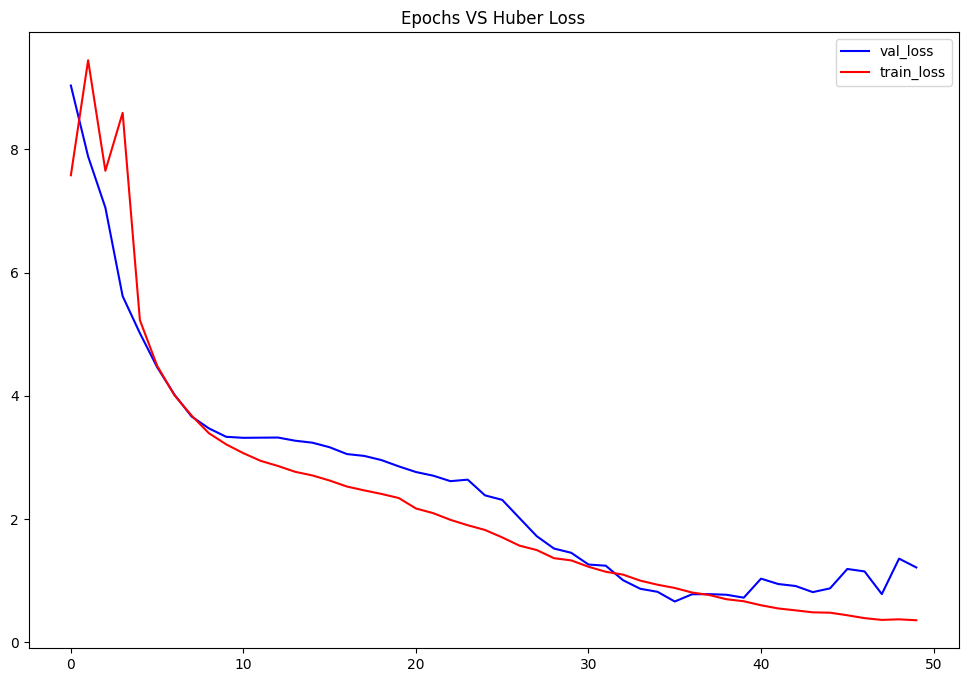

In [46]:
epochs =  range(50)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Huber Loss')
plt.plot(epochs, history.history["val_loss"],color='b',label='val_loss')
plt.plot(epochs, history.history["loss"],color='r',label='train_loss')
plt.legend()

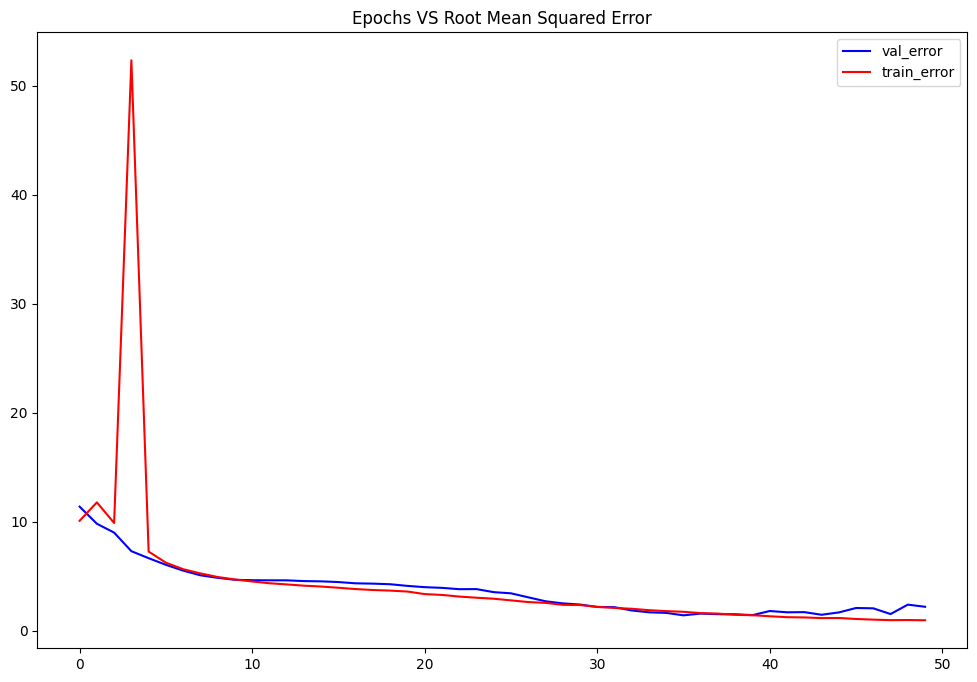

In [47]:
epochs =  range(50)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Root Mean Squared Error')
plt.plot(epochs, history.history["val_root_mean_squared_error"],color='b',label='val_error')
plt.plot(epochs, history.history["root_mean_squared_error"],color='r',label='train_error')
plt.legend()

### Saving the model and weights

In [48]:
model.save_weights('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/conv_net_lstm_weights_epochs_50')

In [49]:
model.save('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/conv_net_lstm_model_epochs_50')

### Load Saved Model

In [50]:
new_model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

new_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, None, 6)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          992       
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)              

In [51]:
new_model.load_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")

In [52]:
# serialize model to JSON
model_json = new_model.to_json()
with open("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model.save_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
# load json and create model
from tensorflow.keras.models import model_from_json
json_file = open('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [54]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, None, 6)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          992       
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)              

Train Model for one Time Lag

In [55]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, 0, batch_size, shuffle_buffer)
dataset_test = windowed_dataset(x_valid, 0, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

# 4e-4
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-10 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

# [tf.keras.metrics.RootMeanSquaredError()]
# tf.keras.losses.Huber()

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(dataset,validation_data=dataset_test,epochs=23)

Epoch 1/23
210/210 [==============================] - 13s 30ms/step - loss: 10.7736 - root_mean_squared_error: 13.5133 - val_loss: 9.0574 - val_root_mean_squared_error: 11.5410
Epoch 2/23
210/210 [==============================] - 7s 33ms/step - loss: 9.6096 - root_mean_squared_error: 12.1288 - val_loss: 7.4748 - val_root_mean_squared_error: 9.5332
Epoch 3/23
210/210 [==============================] - 6s 27ms/step - loss: 7.4802 - root_mean_squared_error: 9.8115 - val_loss: 6.6522 - val_root_mean_squared_error: 8.6949
Epoch 4/23
210/210 [==============================] - 6s 27ms/step - loss: 5.7517 - root_mean_squared_error: 7.9332 - val_loss: 5.6174 - val_root_mean_squared_error: 7.3872
Epoch 5/23
210/210 [==============================] - 8s 38ms/step - loss: 3.7862 - root_mean_squared_error: 5.5356 - val_loss: 4.4273 - val_root_mean_squared_error: 5.9476
Epoch 6/23
210/210 [==============================] - 7s 32ms/step - loss: 3.0345 - root_mean_squared_error: 4.5275 - val_loss: 3.

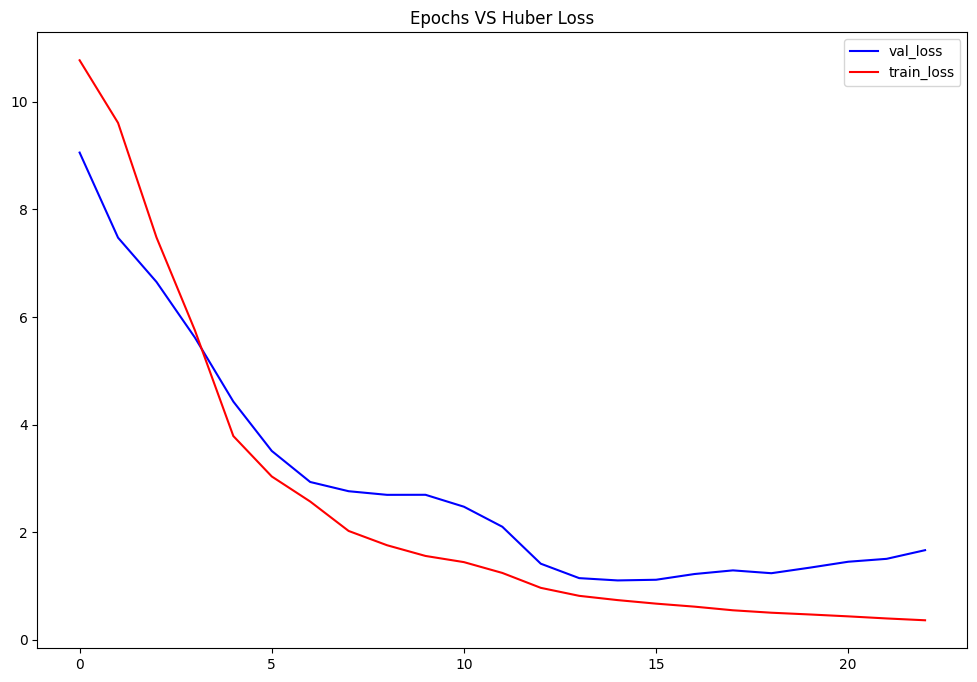

In [56]:
epochs =  range(23)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Huber Loss')
plt.plot(epochs, history.history["val_loss"],color='b',label='val_loss')
plt.plot(epochs, history.history["loss"],color='r',label='train_loss')
plt.legend()

In [57]:
# model.save('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/hourly_lstm_weights_epochs_23')

## Model Forecast And Prediction Section

In [62]:
series = x_valid.values[:,:-1]
y_valid = x_valid.values[:,-1]

In [59]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [82]:
model_forecast(model, series[0][np.newaxis,...], 0)[0][0]

1/1 [==============================] - 0s 38ms/step


-19.559116

In [89]:
rnn_forecast = model_forecast(model, series, 0)
rnn_forecast = rnn_forecast[:,0]

446/446 [==============================] - 3s 7ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


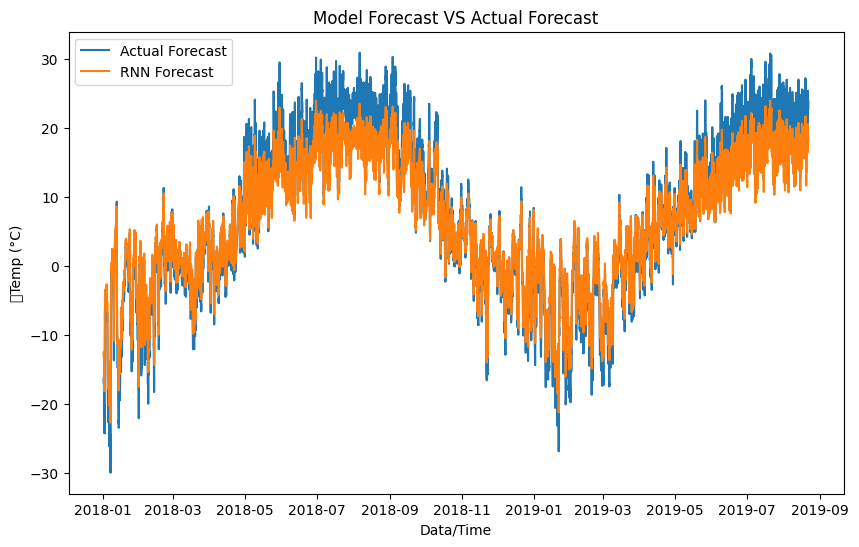

In [91]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Model Forecast VS Actual Forecast')
ax.plot(time_valid[window_size:], y_valid[window_size:],label='Actual Forecast')
ax.plot(time_valid[window_size:], rnn_forecast[window_size:],label='RNN Forecast')
ax.set_xlabel('Data/Time')
ax.set_ylabel('	Temp (°C)')
ax.legend()

## Looking at the prediction plot of the data above the RNN(LSTM) model performs well in forecasting future unseen temperature values, The actual future temperature value plot is in Blue while the RNN(LSTM) model Forecast Predictions is in orange

In [95]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# # plt.ylim(0,4)
# # plt.axis([1e-10, 1e-4, 0, 30])

## Trying Out the Univariate approach to see if better forecast can be generated

### Using the temperature data only for model training

In [96]:
split_time = sum(test.index.year == 2015) + sum(test.index.year == 2016) + sum(test.index.year == 2017)
time_train = test.index[:split_time]
x_train = test.iloc[:split_time]
time_valid = test.index[split_time:]
x_valid = test.iloc[split_time:]

window_size =14
batch_size = 32
shuffle_buffer = 11

#### Helper Function for preparing the data to a form acceptable by the model together with model building and training

In [97]:
def window_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

dataset = window_dataset(x_train, window_size, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                    input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu', return_sequences=True)),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu')),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8,activation='relu'),
  tf.keras.layers.Dense(1)
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
# Train model
history = model.fit(dataset, epochs=100) #callbacks=[lr_schedule])

Epoch 1/100
779/779 [==============================] - 27s 26ms/step - loss: 4.5065 - root_mean_squared_error: 8.3979
Epoch 2/100
779/779 [==============================] - 22s 28ms/step - loss: 2.3803 - root_mean_squared_error: 4.3534
Epoch 3/100
779/779 [==============================] - 20s 25ms/step - loss: 1.9383 - root_mean_squared_error: 3.6587
Epoch 4/100
779/779 [==============================] - 21s 27ms/step - loss: 1.6025 - root_mean_squared_error: 3.1708
Epoch 5/100
779/779 [==============================] - 20s 26ms/step - loss: 1.4557 - root_mean_squared_error: 2.9622
Epoch 6/100
779/779 [==============================] - 21s 27ms/step - loss: 1.6457 - root_mean_squared_error: 3.4559
Epoch 7/100
779/779 [==============================] - 21s 27ms/step - loss: 1.8585 - root_mean_squared_error: 3.9484
Epoch 8/100
779/779 [==============================] - 20s 26ms/step - loss: 1.8576 - root_mean_squared_error: 3.7003
Epoch 9/100
779/779 [==============================] - 2

### Model Evaluation

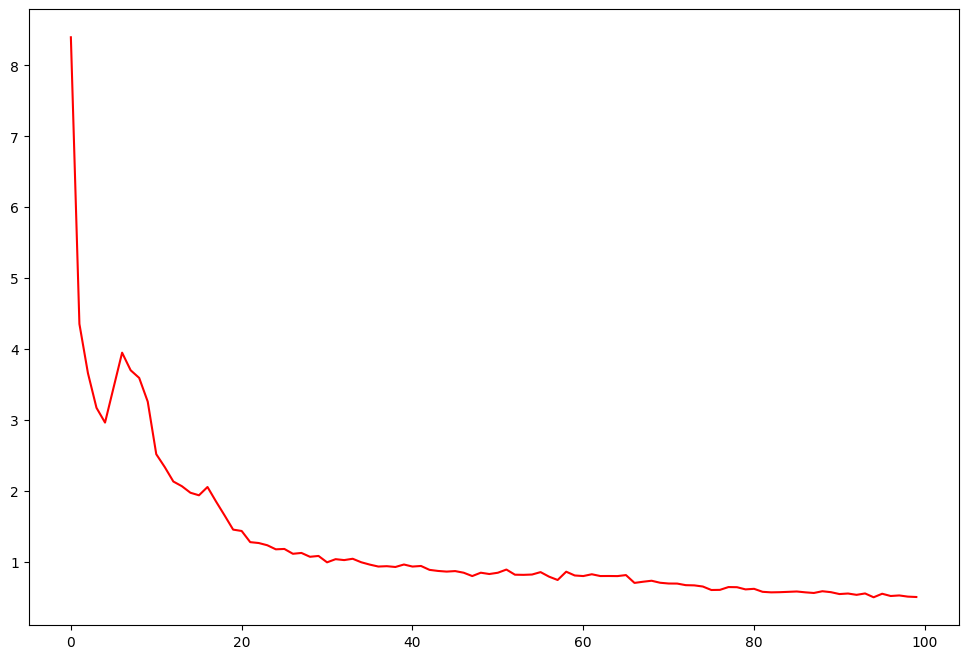

In [98]:
epochs =  range(100)
plt.figure(figsize=(12,8))
plt.plot(epochs, history.history["root_mean_squared_error"],color='r')

### Forecast and Prediction

In [99]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [100]:
rnn_forecast = model_forecast(model, x_valid.values[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[:,0]

445/445 [==============================] - 4s 8ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


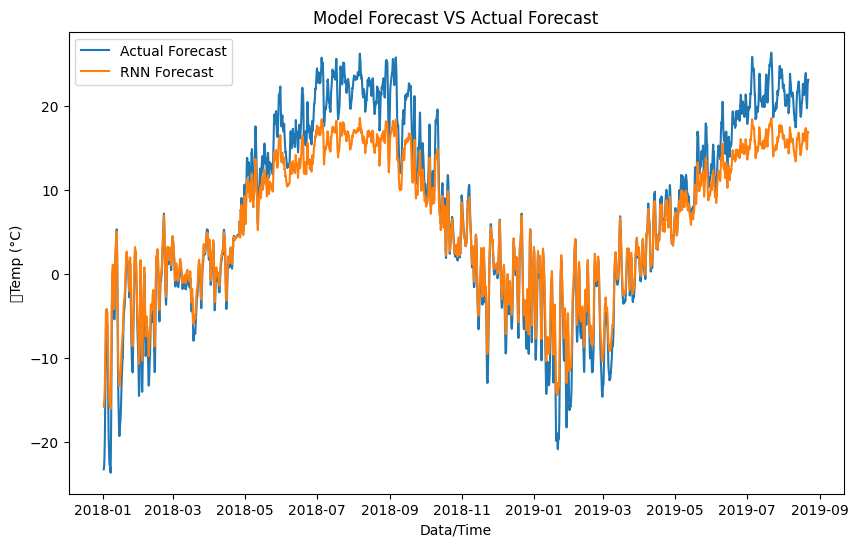

In [104]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Model Forecast VS Actual Forecast')
ax.plot(time_valid[window_size:], x_valid.values[window_size:],label='Actual Forecast')
ax.plot(time_valid[window_size:], rnn_forecast,label='RNN Forecast')
ax.set_xlabel('Data/Time')
ax.set_ylabel('	Temp (°C)')
ax.legend()

#### Looking at the plot, it is clear that the Temperature alone is sufficient to forecast future temperature as the data is auto-correlated and the model can generate patterns from it,however the Predictions are not as optimal as that of the multi-variate approach